# Neural Network Function

This notebook will develop a function that can create a neural network with some parameters for the user to input. Doing this will make it easier to test multiple neural networks with different parameters.

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

In [2]:
# Set the random seed so that all weights/biases are initialized to the same value
tf.random.set_seed(1)

Load the Data

In [4]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

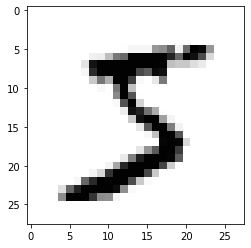

In [6]:
plt.imshow(X_train[0], cmap='Greys')

In [7]:
y_train[0]

5

In [8]:
X_train = X_train.reshape(60000, 28*28)

Make sure to normalize your pixels. This increases learning accuracy.

In [9]:
X_train = X_train / 255
X_test = X_test / 255


Everything looks good with the data now we can start making our neural networks.

### **`build_dense_model`**

This function will help us build our actual model so it will take in the amount of hidden layers and hidden units to build the model. Next it will compile the model and run it. Lastly, it will plot a graph of the validation and testing accuracy so we can see how the training is going.

In [10]:
def build_dense_model(n_layers, n_hidden_units, epochs, X_train, y_train):
  model = Sequential(testing_out_layers(n_layers, n_hidden_units))

  # Define a loss function
  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

  # Compile the model
  model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.3)

  plot_history(history, n_hidden_units, n_layers, epochs)

  return history

### **`testing_out_layers`**

This function will build the actual model. This can then be inputed into `build_dense_model` by using Sequential.

In [11]:
def testing_out_layers(n_layers, n_hidden_units):
  layers = []
  for i in range(n_layers-1):
    layers.append(Dense(n_hidden_units[i]))
  layers.append(Dense(n_hidden_units[-1], activation='softmax'))
  return layers

### **`plot_history`**

This function will help make the graph of validation accuracy and training accuracy.

In [ ]:
def plot_history(history, hidden_units, n_layers, epochs):
  epochs = range(epochs)

  train_acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  plt.figure(figsize=(12, 8))
  plt.plot(epochs, train_acc, color='blue', label='Training accuracy')
  plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
  plt.title(f'Model with {n_layers} layers and {hidden_units} hidden units')
  plt.legend()
  plt.grid()

Now let's put it all together to make a real model!

Epoch 1/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4778 - accuracy: 0.8566 - val_loss: 0.3429 - val_accuracy: 0.9007
Epoch 2/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3254 - accuracy: 0.9083 - val_loss: 0.3169 - val_accuracy: 0.9103
Epoch 3/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3049 - accuracy: 0.9131 - val_loss: 0.3143 - val_accuracy: 0.9121
Epoch 4/5
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2966 - accuracy: 0.9150 - val_loss: 0.3100 - val_accuracy: 0.9137
Epoch 5/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2892 - accuracy: 0.9174 - val_loss: 0.3093 - val_accuracy: 0.9146


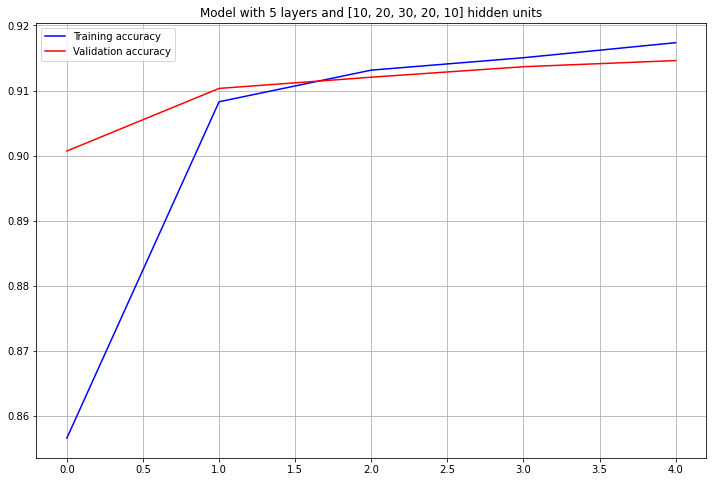

In [13]:
build_dense_model(n_layers=5, n_hidden_units=[10, 20, 30, 20, 10], epochs=5, X_train=X_train, y_train=y_train)

This will help us run multiple models at once.

In [ ]:
for n_hidden_units in range(1, 5):
  build_dense_model(n_layers=5,
                    n_hidden_units=[n_hidden_units for _ in range(5)], 
                    epochs=10, 
                    X_train=X_train, 
                    y_train=y_train)